# TASK3: To predict the optimum number of clusters and represent it visually,of the given data set.

In [3]:
##Importing Required Libraries
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import datasets

In [7]:
#Reading Dataset
data=pd.read_csv("~/Desktop/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
data.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
5      6            5.4           3.9            1.7           0.4   
6      7            4.6           3.4            1.4           0.3   
7      8            5.0           3.4            1.5           0.2   
8      9            4.4           2.9            1.4           0.2   
9     10            4.9           3.1            1.5           0.1   
10    11            5.4           3.7            1.5           0.2   
11    12            4.8           3.4            1.6           0.2   
12    13            4.8           3.0            1.4      

In [9]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Check for Missing Values

In [10]:
data.sum().isnull()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [11]:
#Now Check the Species of the flowers 
print(data['Species'].unique())
print('\n''Quantity of the Species :-''\n''\n',data['Species'].value_counts())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

Quantity of the Species :-

 Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


## Data Visualization

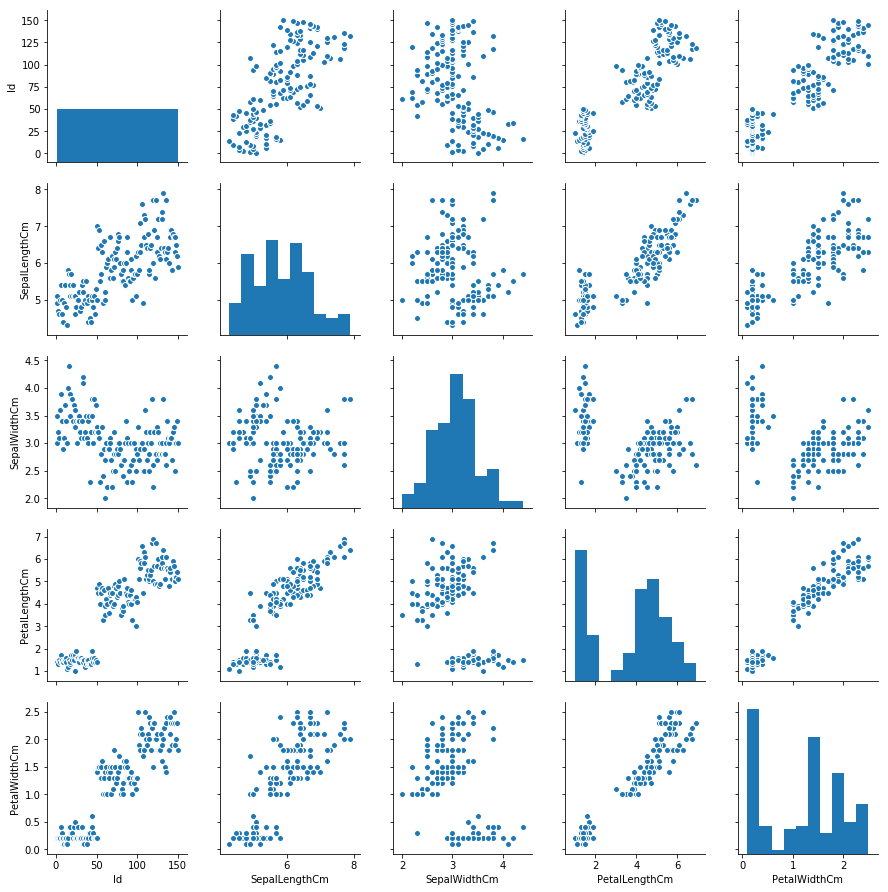

In [12]:
sns.pairplot(data)

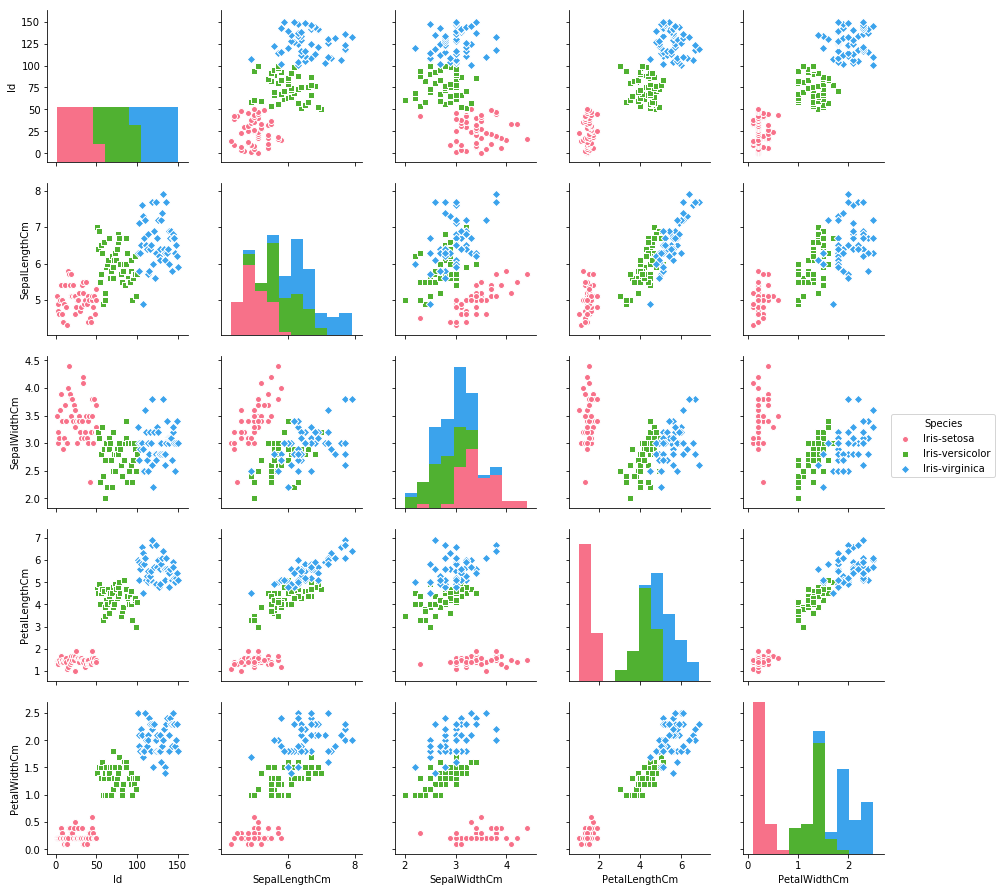

In [15]:
sns.pairplot(data=data,hue='Species',palette="husl",markers=["o","s","D"])
plt.show()

## Finding optimum number of cluster using Elbow Method

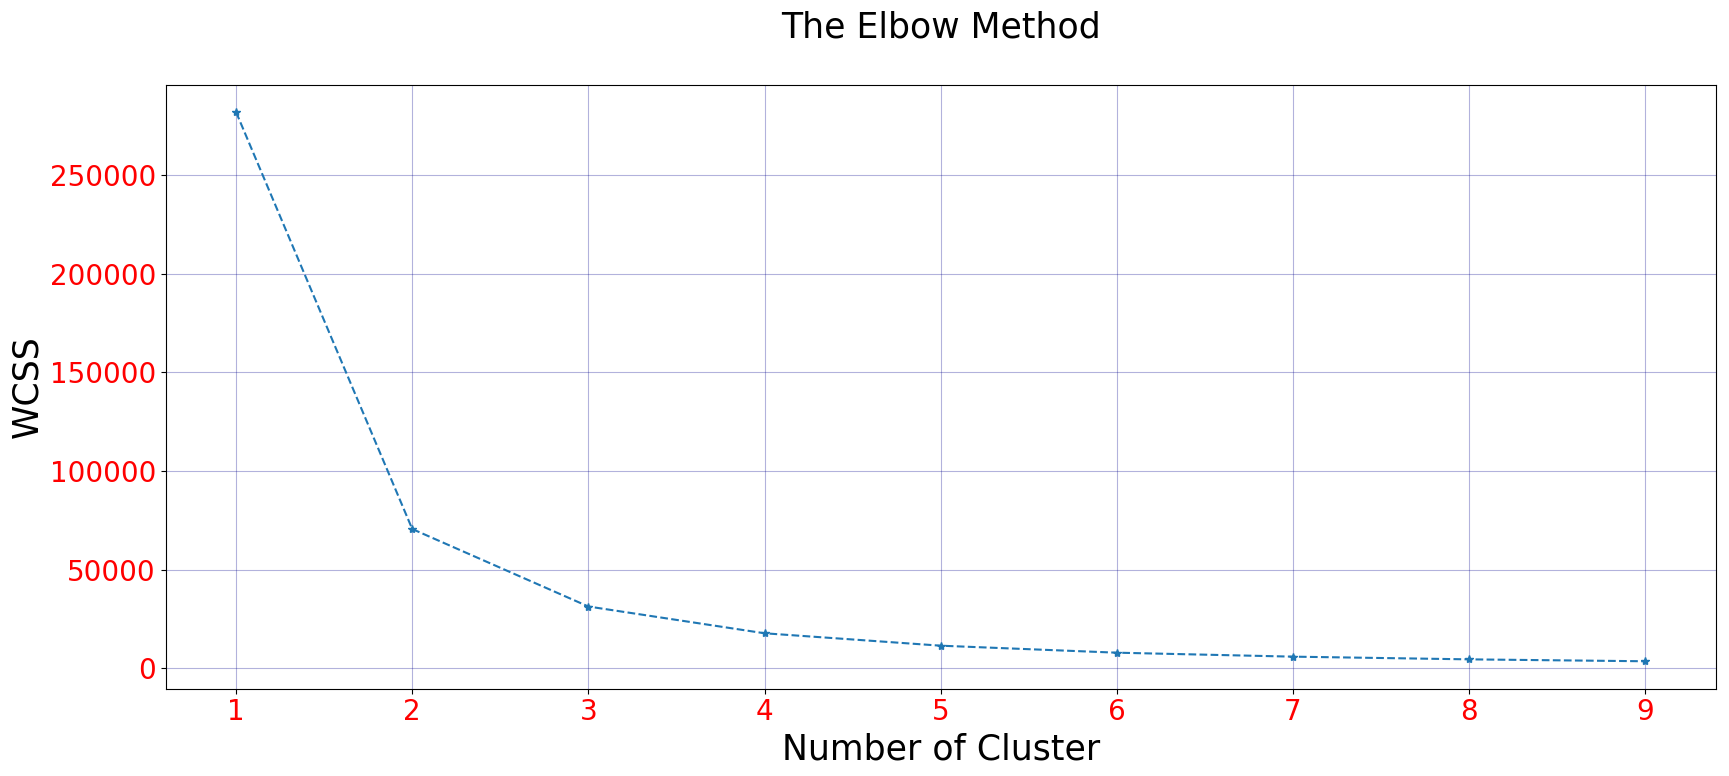

In [17]:
x=data.iloc[:,0:4].values

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
  km=KMeans(n_clusters=i,init ='k-means++',max_iter=300,n_init=10,random_state=0)
  km.fit(x)
  wcss.append(km.inertia_)

plt.figure(figsize=(20,8),dpi=100)
plt.grid(color='darkBlue',alpha=0.3)
plt.plot(range(1,10),wcss,'*--')
plt.yticks(fontsize=20,color='red')
plt.xticks(fontsize=20,color='red')
plt.title('The Elbow Method' '\n',color='black',size=25)
plt.xlabel('Number of Cluster',color='black',size=25)
plt.ylabel('WCSS',color='black',size=25)
plt.show()

### From Elbow method, we see that the second bend on the diagram is at K=3.

In [20]:
kmeans=KMeans(n_clusters=3,init ='k-means++',max_iter=300,n_init=10,random_state=0)
y=kmeans.fit_predict(x)
data['Prediction']=y
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Prediction
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


## Visualizing the Cluster

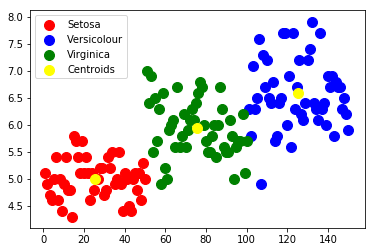

In [24]:
plt.scatter(x[y==0,0],x[y==0,1],s=100,c='red',label='Setosa')
plt.scatter(x[y==1,0],x[y==1,1],s=100,c='blue',label='Versicolour')
plt.scatter(x[y==2,0],x[y==2,1],s=100,c='green',label='Virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.legend()